# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
!pip install matplotlib
import matplotlib.pyplot as plt

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 640.0 kB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.1/7.8 MB 22.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 27.6 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 31.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.3/7.8 MB 31.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------  7.7/7.8 MB 29.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/188.2 kB ? eta -:--:--
   -----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
fraud
0.0    0

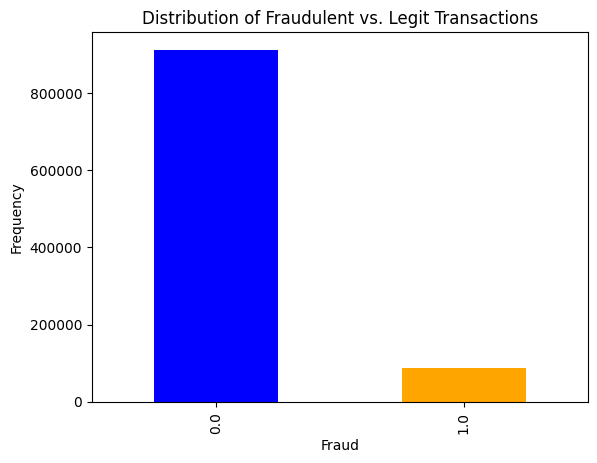

In [4]:

# Display the first few rows of the dataset
print(fraud.head())

# Check the distribution of the target variable
fraud_distribution = fraud['fraud'].value_counts(normalize=True)
print(fraud_distribution)

# Plot the distribution
fraud['fraud'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Fraudulent vs. Legit Transactions')
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.show()

In [5]:
#Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[181291   1228]
 [  6916  10565]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [10]:
# Evaluate the Model with Imbalanced Data
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Proceed with the rest of your code

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate Precision, Recall, and F1-score for the minority class (fraud=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision (fraud): {precision:.4f}")
print(f"Recall (fraud): {recall:.4f}")
print(f"F1 Score (fraud): {f1:.4f}")



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.3 kB 656.4 kB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
Confusion Matrix:
 [[181291   1228]
 [  6916  10565]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

Precision (fraud): 0.8959
Recall (fraud): 0.6044
F1 Score (fraud): 0.7218


In [11]:
# Balance the Data with Oversampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train Logistic Regression on oversampled data
model.fit(X_resampled, y_resampled)
y_pred_oversampled = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_oversampled))
print(classification_report(y_test, y_pred_oversampled))


[[170390  12129]
 [   910  16571]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [12]:
# Balance the Data with Undersampling

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train Logistic Regression on undersampled data
model.fit(X_resampled, y_resampled)
y_pred_undersampled = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_undersampled))
print(classification_report(y_test, y_pred_undersampled))



[[170387  12132]
 [   918  16563]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [13]:
# Balance the Data with SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data
model.fit(X_resampled, y_resampled)
y_pred_smote = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))



[[170498  12021]
 [   942  16539]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

